In [689]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [690]:
#Loading the dataset into Lead_Bid
Lead_Bid = pd.read_csv(r'C:\Users\Megharjun\Desktop\Megha\Soaren_Management_Lead_Bid_Test_Data.csv')

In [691]:
#printing the number of records and the head of the dataframe
print("Number of records: {}\nNumber of variables: {}".format(Lead_Bid.shape[0], Lead_Bid.shape[1]))
Lead_Bid.head(10)

Number of records: 53950
Number of variables: 5


,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
0,58995330,NaN,0,-106.80,0.336
1,58995358,NaN,0,-43.12,0.219
2,58995397,NaN,0,-90.56,0.332
3,58995410,NaN,0,-82.08,0.308
4,58995635,NaN,0,94.88,0.321
5,58995654,NaN,0,19.68,0.518
6,58995685,NaN,0,-59.92,0.403
7,58995772,NaN,0,49.92,0.522
8,58995792,35.0,0,360.67,0.086
9,58995977,35.0,1,271.49,0.356


In [692]:
#Making a copy of the original data set
New_Lead_Bid = Lead_Bid.copy()

# Data Cleaning and Visualization of New_Lead_Bid 

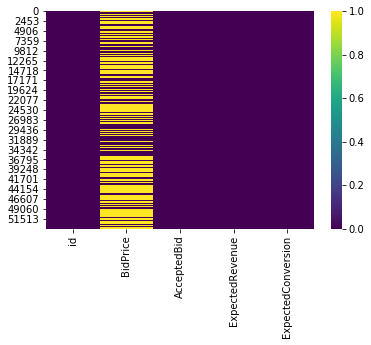

In [693]:
#Finding Null Values using heatmap
sns.heatmap(New_Lead_Bid.isnull(), cmap ='viridis')

In [694]:
#Since only BidPrice has null values we are droping all the rows in bid price containing null values
New_Lead_Bid = New_Lead_Bid.dropna(axis=0)
New_Lead_Bid.isnull().sum()

id                    0
BidPrice              0
AcceptedBid           0
ExpectedRevenue       0
ExpectedConversion    0
dtype: int64

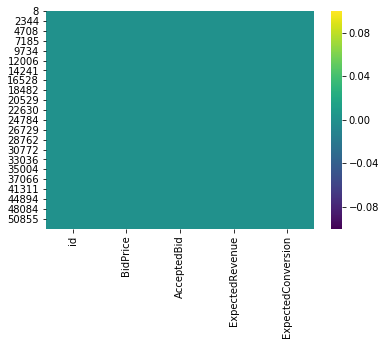

In [695]:
sns.heatmap(New_Lead_Bid.isnull(), cmap ='viridis')

In [696]:
#Since the id column is not required as it does not give any information we are droping it
New_Lead_Bid = New_Lead_Bid.drop(['id'], axis =1)
New_Lead_Bid.head(10)

,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
8,35.0,0,360.67,0.086
9,35.0,1,271.49,0.356
10,35.0,1,184.64,0.319
11,35.0,0,107.60,0.446
12,35.0,1,82.80,0.463
13,35.0,1,158.96,0.243
14,75.0,1,614.01,0.158
15,75.0,1,613.61,0.337
20,35.0,1,414.24,0.396
21,75.0,1,676.15,0.173


In [697]:
#Calculating the number of rows,column left after droping the null values and droping column id
print("Number of records: {}\nNumber of variables: {}".format(New_Lead_Bid.shape[0], New_Lead_Bid.shape[1]))

Number of records: 21946
Number of variables: 4


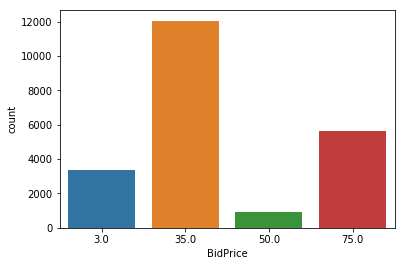

In [698]:
#countplot for statistical analysis
sns.countplot(x='BidPrice', data = New_Lead_Bid)

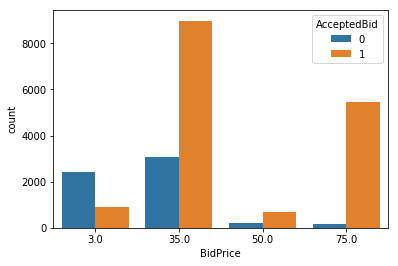

In [699]:
#countplot for statistical analysis
sns.countplot(x='BidPrice',hue = 'AcceptedBid', data = New_Lead_Bid)

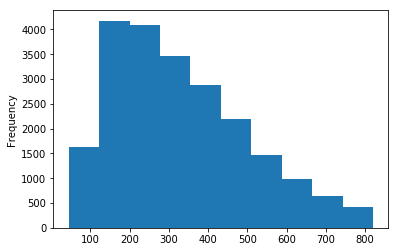

In [700]:
#Histogram for stastical analysis
New_Lead_Bid["ExpectedRevenue"].plot.hist()

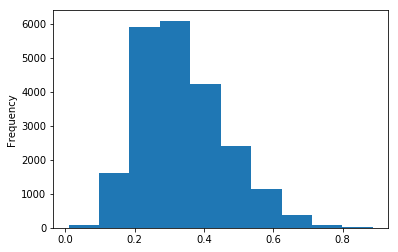

In [701]:
#Histogram for stastical analysis
New_Lead_Bid["ExpectedConversion"].plot.hist()

In [702]:
#The describe() function computes a summary of statistics pertaining to the DataFrame columns.
New_Lead_Bid.describe()

,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
count,21946.000000,21946.000000,21946.000000,21946.000000
mean,40.982594,0.730247,330.324871,0.337698
std,23.222230,0.443842,169.283326,0.124755
min,3.000000,0.000000,44.640000,0.009000
25%,35.000000,0.000000,194.240000,0.245000
50%,35.000000,1.000000,301.060000,0.319000
75%,75.000000,1.000000,438.862500,0.414000
max,75.000000,1.000000,820.000000,0.887000


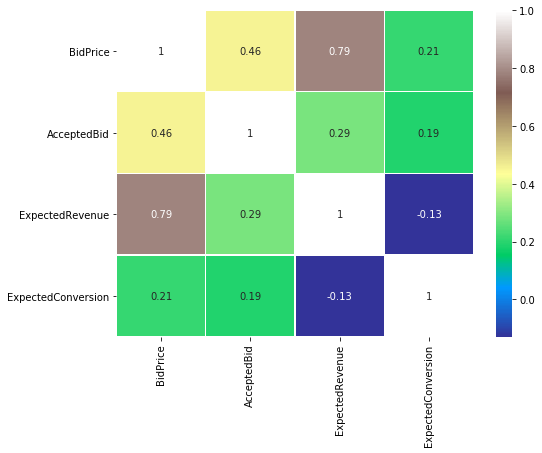

In [703]:
# create a correlation heatmap
sns.heatmap(New_Lead_Bid.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [704]:
# count AcceptedBid vs BidPrice and grouped by BidPrice
New_Lead_Bid.groupby(['AcceptedBid','BidPrice'])['BidPrice'].count()

AcceptedBid  BidPrice
0            3.0         2435
             35.0        3086
             50.0         227
             75.0         172
1            3.0          913
             35.0        8975
             50.0         695
             75.0        5443
Name: BidPrice, dtype: int64

In [705]:
New_Lead_Bid.head(10)

,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
8,35.0,0,360.67,0.086
9,35.0,1,271.49,0.356
10,35.0,1,184.64,0.319
11,35.0,0,107.60,0.446
12,35.0,1,82.80,0.463
13,35.0,1,158.96,0.243
14,75.0,1,614.01,0.158
15,75.0,1,613.61,0.337
20,35.0,1,414.24,0.396
21,75.0,1,676.15,0.173


# Data Preprocessing 

In [706]:
#Splitting the independent variables from the dependent variable
X= New_Lead_Bid.drop(["AcceptedBid"], axis=1)
y= New_Lead_Bid['AcceptedBid']

In [707]:
#splitting it into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [708]:
#standardization of X,y variables
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

# Modelling and Predicting with Machine learning

## 1)Logistic Regression 

In [709]:
classifier_Logistic = LogisticRegression(random_state = 0) 
classifier_Logistic.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [710]:
y_pred_Logistic = classifier_Logistic.predict(X_test)
y_pred_train_Logistic = classifier_Logistic.predict(X_train)

In [711]:
conf_matrix_Logistic = confusion_matrix(y_test, y_pred_Logistic)
print(conf_matrix_Logistic)

[[ 824 1107]
 [ 303 5009]]


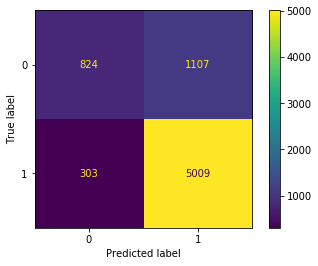

In [712]:
plot_confusion_matrix(classifier_Logistic, X_test, y_test)
plt.show()

In [713]:
print('Test')
print('Accuracy',accuracy_score(y_pred_Logistic,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_Logistic,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test, y_pred_Logistic,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_Logistic,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_Logistic,y_train))

Test
Accuracy 0.8053292834460859
--------------------------
Precision of 1: 0.7750719888717565


F1 score: 0.707766577014266


Recall of 1: 0.6848406215488573
--------------------------
Train
Accuracy 0.796844181459566


## 2)Decision Trees

In [714]:
classifier_Trees = DecisionTreeClassifier(criterion = 'entropy')
classifier_Trees.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [715]:
y_pred_Trees = classifier_Trees.predict(X_test)
y_pred_train_Trees = classifier_Trees.predict(X_train)

In [716]:
conf_matrix_Trees = confusion_matrix(y_test, y_pred_Trees) 
print(conf_matrix_Trees)

[[ 915 1016]
 [1150 4162]]


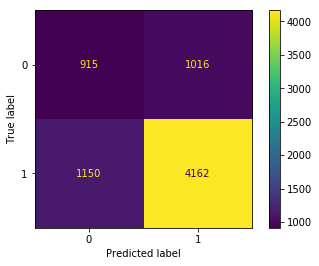

In [717]:
plot_confusion_matrix(classifier_Trees, X_test, y_test)
plt.show()

In [718]:
print('Test')
print('Accuracy',accuracy_score(y_pred_Trees,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_Trees,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test, y_pred_Trees,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_Trees,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_Trees,y_train))

Test
Accuracy 0.7009526439320724
--------------------------
Precision of 1: 0.6234422594380958


F1 score: 0.6257377969008093


Recall of 1: 0.6286783917128899
--------------------------
Train
Accuracy 0.9995919200163232


## 3)Random Forest

In [719]:
classifier_Forest=RandomForestClassifier(n_estimators=75, criterion='entropy')
classifier_Forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=75)

In [720]:
y_pred_Forest=classifier_Forest.predict(X_test)
y_pred_train_Forest = classifier_Trees.predict(X_train)

In [721]:
conf_matrix_Forest = confusion_matrix(y_test, y_pred_Forest) 
print(conf_matrix_Forest)

[[ 903 1028]
 [ 698 4614]]


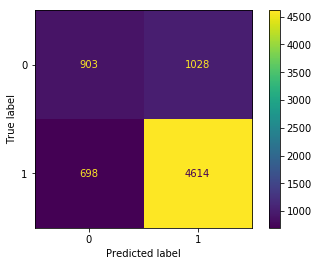

In [722]:
plot_confusion_matrix(classifier_Forest, X_test, y_test)
plt.show()

In [723]:
print('Test')
print('Accuracy',accuracy_score(y_pred_Forest,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_Forest,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test, y_pred_Forest,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_Forest,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_Forest,y_train))

Test
Accuracy 0.7617009526439321
--------------------------
Precision of 1: 0.6909087970319862


F1 score: 0.6768785083136709


Recall of 1: 0.6681163740929539
--------------------------
Train
Accuracy 0.9995919200163232


## 4)K nearest neighbors

In [724]:
classifier_Knn = KNeighborsClassifier(n_neighbors=3)
classifier_Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [725]:
y_pred_Knn=classifier_Knn.predict(X_test)
y_pred_train_Knn = classifier_Knn.predict(X_train)

In [726]:
conf_matrix_Forest = confusion_matrix(y_test, y_pred_Knn) 
print(conf_matrix_Forest)

[[ 899 1032]
 [ 758 4554]]


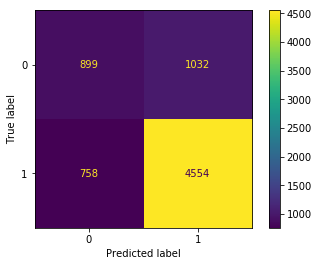

In [727]:
plot_confusion_matrix(classifier_Knn, X_test, y_test)
plt.show()

In [728]:
print('Test')
print('Accuracy',accuracy_score(y_pred_Knn,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_Knn,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test, y_pred_Knn,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_Knn,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_Knn,y_train))

Test
Accuracy 0.7528648350131161
--------------------------
Precision of 1: 0.6788995940147808


F1 score: 0.668432253020969


Recall of 1: 0.6614330509505656
--------------------------
Train
Accuracy 0.852002992586547


## 5)Support Vector Machine

In [729]:
classifier_SVM = svm.SVC(kernel='linear') # Linear Kernel
classifier_SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [730]:
y_pred_SVM=classifier_SVM.predict(X_test)
y_pred_train_SVM = classifier_SVM.predict(X_train)

In [731]:
conf_matrix_Forest = confusion_matrix(y_test, y_pred_SVM) 
print(conf_matrix_Forest)

[[ 824 1107]
 [ 303 5009]]


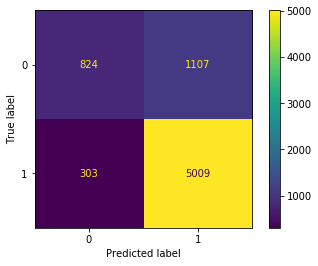

In [732]:
plot_confusion_matrix(classifier_SVM, X_test, y_test)
plt.show()

In [733]:
print('Test')
print('Accuracy',accuracy_score(y_pred_SVM,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_SVM,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test,y_pred_SVM,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_SVM,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_SVM,y_train))

Test
Accuracy 0.8053292834460859
--------------------------
Precision of 1: 0.7750719888717565


F1 score: 0.707766577014266


Recall of 1: 0.6848406215488573
--------------------------
Train
Accuracy 0.7967761681289532


## 6) Neural Network

In [734]:
classifier_NN = MLPClassifier(hidden_layer_sizes=10,activation='relu')
classifier_NN.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10)

In [735]:
y_pred_NN=classifier_NN.predict(X_test)
y_pred_train_NN = classifier_NN.predict(X_train)

In [736]:
conf_matrix_Forest = confusion_matrix(y_test, y_pred_NN) 
print(conf_matrix_Forest)

[[ 800 1131]
 [ 292 5020]]


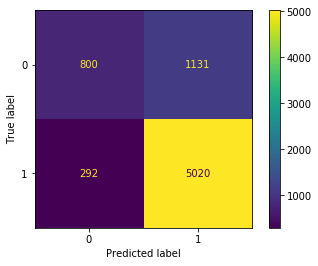

In [737]:
plot_confusion_matrix(classifier_NN, X_test, y_test)
plt.show()

In [738]:
print('Test')
print('Accuracy',accuracy_score(y_pred_NN,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_NN,pos_label=1,average='weighted'))
print('\n')
print('F1 score:', f1_score(y_test,y_pred_NN,average='weighted'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_NN,pos_label=1,average='weighted'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_NN,y_train))

Test
Accuracy 0.8035344470523264
--------------------------
Precision of 1: 0.7938590468857051


F1 score: 0.7834608876700271


Recall of 1: 0.8035344470523264
--------------------------
Train
Accuracy 0.7959600081615996


## 7)Naive Bayes

In [739]:
classifier_GaussianNB = GaussianNB()
classifier_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [740]:
y_pred_GaussianNB=classifier_GaussianNB.predict(X_test)
y_pred_train_GaussianNB = classifier_GaussianNB.predict(X_train)

In [741]:
conf_matrix_Forest = confusion_matrix(y_test, y_pred_GaussianNB) 
print(conf_matrix_Forest)

[[ 981  950]
 [ 709 4603]]


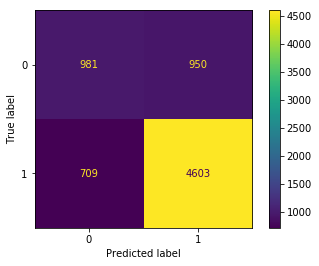

In [742]:
plot_confusion_matrix(classifier_GaussianNB, X_test, y_test)
plt.show()

In [743]:
print('Test')
print('Accuracy',accuracy_score(y_pred_GaussianNB,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_GaussianNB,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test,y_pred_GaussianNB,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_GaussianNB,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_train_GaussianNB,y_train))

Test
Accuracy 0.7709512632886926
--------------------------
Precision of 1: 0.7046973382904065


F1 score: 0.6945735701123719


Recall of 1: 0.687277771755068
--------------------------
Train
Accuracy 0.76317758280623


## 8)Boosting - AdaBoost

In [744]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=12)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=12)

In [745]:
y_pred_ada = ada_boost.predict(X_test)
y_pred_ada_train = ada_boost.predict(X_train)

In [746]:
conf_matrix_Forest = confusion_matrix(y_test, y_pred_ada) 
print(conf_matrix_Forest)

[[ 816 1115]
 [ 508 4804]]


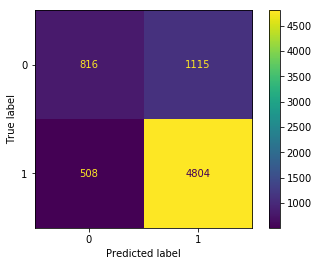

In [747]:
plot_confusion_matrix(ada_boost, X_test, y_test)
plt.show()

In [748]:
print('Test')
print('Accuracy',accuracy_score(y_pred_ada,y_test))
print('--------------------------')
print('Precision of 1:',precision_score(y_test,y_pred_ada,pos_label=1,average='macro'))
print('\n')
print('F1 score:', f1_score(y_test,y_pred_ada,average='macro'))
print('\n')
print('Recall of 1:',recall_score(y_test,y_pred_ada,pos_label=1,average='macro'))
print('--------------------------')
print('Train')
print('Accuracy',accuracy_score(y_pred_ada_train,y_train))

Test
Accuracy 0.7759215794560265
--------------------------
Precision of 1: 0.7139688922304075


F1 score: 0.6784358796238357


Recall of 1: 0.6634732222520325
--------------------------
Train
Accuracy 0.8486703393865198


# Roc and Precision

AUC for  Logistic Regression  =  0.6848406215488573
AUC for  Decision Trees  =  0.62867839171289
AUC for  Random Forest  =  0.6681163740929539
AUC for  K Nearest neighbours  =  0.6614330509505656
AUC for  Support Vector Machines  =  0.6848406215488573
AUC for  Nueral Network  =  0.6796616164294671
AUC for  Naive Bayes  =  0.687277771755068
AUC for  AdaBoost  =  0.6634732222520325


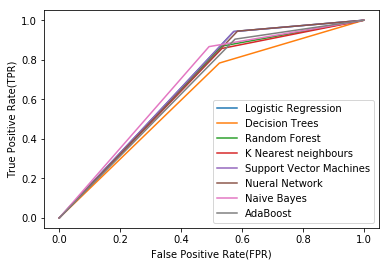

In [749]:
from sklearn.metrics import roc_curve, auc


classifier_predictions = [y_pred_Logistic,y_pred_Trees,y_pred_Forest,y_pred_Knn,y_pred_SVM,y_pred_NN,y_pred_GaussianNB,y_pred_ada]
classifier_names = ["Logistic Regression",'Decision Trees',"Random Forest",'K Nearest neighbours','Support Vector Machines','Nueral Network','Naive Bayes','AdaBoost']
for i in range(len(classifier_predictions)):
    fpr,tpr,thresholds = roc_curve(y_test,classifier_predictions[i])
    plt.plot(fpr,tpr,label= classifier_names[i])
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    print("AUC for ",classifier_names[i]," = ",auc(fpr,tpr))

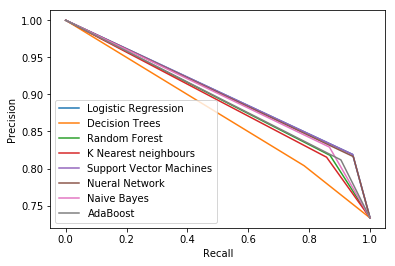

In [750]:
from sklearn.metrics import precision_recall_curve

classifier_predictions = [y_pred_Logistic,y_pred_Trees,y_pred_Forest,y_pred_Knn,y_pred_SVM,y_pred_NN,y_pred_GaussianNB,y_pred_ada]
classifier_names = ["Logistic Regression",'Decision Trees',"Random Forest",'K Nearest neighbours','Support Vector Machines','Nueral Network','Naive Bayes','AdaBoost']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(y_test,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

#  Rule Set

In [751]:
# Creating a New data set from Lead_Bid
#creating a new column called revenue
New_Lead_Bid_With_Null = Lead_Bid.copy()
New_Lead_Bid_With_Null['Revenue'] =  New_Lead_Bid_With_Null['ExpectedRevenue']*New_Lead_Bid_With_Null['ExpectedConversion']
New_Lead_Bid_With_Null.head()

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,Revenue
0,58995330,NaN,0,-106.80,0.336,-35.88480
1,58995358,NaN,0,-43.12,0.219,-9.44328
2,58995397,NaN,0,-90.56,0.332,-30.06592
3,58995410,NaN,0,-82.08,0.308,-25.28064
4,58995635,NaN,0,94.88,0.321,30.45648


In [752]:
#Creating a New Column New_BidPrice
New_Lead_Bid_With_Null['New_BidPrice'] = New_Bid_Price

In [753]:
New_Lead_Bid_With_Null.head(10)

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice
0,58995330,NaN,0,-106.80,0.336,-35.88480,0
1,58995358,NaN,0,-43.12,0.219,-9.44328,0
2,58995397,NaN,0,-90.56,0.332,-30.06592,0
3,58995410,NaN,0,-82.08,0.308,-25.28064,0
4,58995635,NaN,0,94.88,0.321,30.45648,3
5,58995654,NaN,0,19.68,0.518,10.19424,3
6,58995685,NaN,0,-59.92,0.403,-24.14776,0
7,58995772,NaN,0,49.92,0.522,26.05824,3
8,58995792,35.0,0,360.67,0.086,31.01762,3
9,58995977,35.0,1,271.49,0.356,96.65044,50


In [754]:
Should_Bid = New_Lead_Bid_With_Null['New_BidPrice'] > 0

In [755]:
New_Lead_Bid_With_Null = New_Lead_Bid_With_Null[Should_Bid]
New_Lead_Bid_With_Null.count()

id                    33002
BidPrice              21940
AcceptedBid           33002
ExpectedRevenue       33002
ExpectedConversion    33002
Revenue               33002
New_BidPrice          33002
dtype: int64

In [756]:
New_Lead_Bid_With_Null.head(10)

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice
4,58995635,NaN,0,94.88,0.321,30.45648,3
5,58995654,NaN,0,19.68,0.518,10.19424,3
7,58995772,NaN,0,49.92,0.522,26.05824,3
8,58995792,35.0,0,360.67,0.086,31.01762,3
9,58995977,35.0,1,271.49,0.356,96.65044,50
10,58996071,35.0,1,184.64,0.319,58.90016,35
11,58996117,35.0,0,107.60,0.446,47.98960,3
12,58996178,35.0,1,82.80,0.463,38.33640,3
13,58996190,35.0,1,158.96,0.243,38.62728,3
14,58996194,75.0,1,614.01,0.158,97.01358,50


# Fitting New Data Frame into our Model and Final Net Revenue

In [757]:
#Creating a copy
New_Lead_Bid = New_Lead_Bid_With_Null.copy()
New_Lead_Bid.head()

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice
4,58995635,NaN,0,94.88,0.321,30.45648,3
5,58995654,NaN,0,19.68,0.518,10.19424,3
7,58995772,NaN,0,49.92,0.522,26.05824,3
8,58995792,35.0,0,360.67,0.086,31.01762,3
9,58995977,35.0,1,271.49,0.356,96.65044,50


In [758]:
#Making it model ready

New_Lead_Bid =New_Lead_Bid[['New_BidPrice','ExpectedRevenue','ExpectedConversion']]
New_Lead_Bid.head()

,New_BidPrice,ExpectedRevenue,ExpectedConversion
4,3,94.88,0.321
5,3,19.68,0.518
7,3,49.92,0.522
8,3,360.67,0.086
9,50,271.49,0.356


In [759]:
#standardization
New_Lead_bid_Array = sc_x.fit_transform(New_Lead_Bid)
print(New_Lead_bid_Array)

[[-1.03372574 -0.8548243  -0.11072334]
 [-1.03372574 -1.26924778  1.50073481]
 [-1.03372574 -1.10259663  1.53345477]
 ...
 [ 0.12953736 -0.15603577 -0.72422264]
 [ 1.58361623  1.58729832 -0.30704312]
 [-1.03372574 -1.22604193  1.14899521]]


In [760]:
#predicting the output with our Neural network that we used above
#Neural network was found to be the best classification algorithm compared to others dues to its high precission,accuracy,recall,Train scores
y_pred_NN_Dataset = classifier_NN.predict(New_Lead_bid_Array)

In [761]:
#Adding a new column Called New_Accepted_Bid which is the predicted values from the neural network
New_Lead_Bid_With_Null["New_Accepted_Bid"] = y_pred_NN_Dataset

In [762]:
New_Lead_Bid_With_Null.head()

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice,New_Accepted_Bid
4,58995635,NaN,0,94.88,0.321,30.45648,3,1
5,58995654,NaN,0,19.68,0.518,10.19424,3,1
7,58995772,NaN,0,49.92,0.522,26.05824,3,1
8,58995792,35.0,0,360.67,0.086,31.01762,3,0
9,58995977,35.0,1,271.49,0.356,96.65044,50,1


In [763]:
#droping the old BidPrice And Accepted Bid
New_Lead_Bid_With_Null = New_Lead_Bid_With_Null.drop(['BidPrice','AcceptedBid'], axis =1)

In [764]:
New_Lead_Bid_With_Null.head()

,id,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice,New_Accepted_Bid
4,58995635,94.88,0.321,30.45648,3,1
5,58995654,19.68,0.518,10.19424,3,1
7,58995772,49.92,0.522,26.05824,3,1
8,58995792,360.67,0.086,31.01762,3,0
9,58995977,271.49,0.356,96.65044,50,1


In [765]:
#Creating an other Column for generating Net_revenue
New_Lead_Bid_With_Null["New_Net_revenue"] = (New_Lead_Bid_With_Null['Revenue']-New_Lead_Bid_With_Null['New_BidPrice'])*New_Lead_Bid_With_Null['New_Accepted_Bid']

In [766]:
New_Lead_Bid_With_Null.head()

,id,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice,New_Accepted_Bid,New_Net_revenue
4,58995635,94.88,0.321,30.45648,3,1,27.45648
5,58995654,19.68,0.518,10.19424,3,1,7.19424
7,58995772,49.92,0.522,26.05824,3,1,23.05824
8,58995792,360.67,0.086,31.01762,3,0,0.00000
9,58995977,271.49,0.356,96.65044,50,1,46.65044


In [767]:
#Considering only bids that were Accepted
No_of_positive_lead = New_Lead_Bid_With_Null.copy()
Positive = No_of_positive_lead['New_Accepted_Bid']==1
No_of_positive_lead=No_of_positive_lead[Positive]

In [768]:
No_of_positive_lead["New_Net_revenue"].count()

25367

In [769]:
# Arranging the data set into by the decreasing order of New_Net_revenue
No_of_positive_lead.sort_values(by=['New_Net_revenue'], inplace=True, ascending=False)

In [770]:
No_of_positive_lead.head(10)

,id,ExpectedRevenue,ExpectedConversion,Revenue,New_BidPrice,New_Accepted_Bid,New_Net_revenue
9324,59596614,818.42,0.838,685.83596,75,1,610.83596
28198,61186573,796.36,0.825,656.99700,75,1,581.99700
34032,61664218,741.40,0.872,646.50080,75,1,571.50080
28652,61224299,820.00,0.756,619.92000,75,1,544.92000
47475,62545122,695.25,0.843,586.09575,75,1,511.09575
17198,60153355,820.00,0.700,574.00000,75,1,499.00000
5476,59398107,613.61,0.871,534.45431,75,1,459.45431
28616,61222001,764.73,0.687,525.36951,75,1,450.36951
29025,61253308,719.49,0.730,525.22770,75,1,450.22770
11262,59679959,809.54,0.644,521.34376,75,1,446.34376


In [771]:
#Since the Call Center Can handle only a perticular number of leads, filtering the data set to 16827 rows
No_of_positive_lead=No_of_positive_lead[:16827]

In [772]:
#final Total net revenue
No_of_positive_lead["New_Net_revenue"].sum()

1291814.1478700002